<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications-2025/blob/main/485%5B2025%5D_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [16]:
# Load the dataset
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [17]:
# Convert DataFrame to NumPy array for indexing demonstration
data = df.to_numpy()

In [18]:
# Basic Indexing
print("Element at row 1, column 2:", data[0, 1])  # Accessing the first row, second column

Element at row 1, column 2: 41.0


In [19]:
# Slicing
print("First two rows and first three columns:\n", data[:2, :3])  # Slicing first two rows and first three columns

First two rows and first three columns:
 [[ 8.3252     41.          6.98412698]
 [ 8.3014     21.          6.23813708]]


In [20]:
# Boolean Indexing
condition = data[:, 0] > 4  # Boolean condition on first column (MedInc)
print("Rows where MedInc is greater than 4:\n", data[condition, :])  # Boolean indexing

Rows where MedInc is greater than 4:
 [[   8.3252       41.            6.98412698 ...   37.88
  -122.23          4.526     ]
 [   8.3014       21.            6.23813708 ...   37.86
  -122.22          3.585     ]
 [   7.2574       52.            8.28813559 ...   37.85
  -122.24          3.521     ]
 ...
 [   5.679        20.            6.40127389 ...   38.56
  -122.05          2.25      ]
 [   4.5625       40.            4.125      ...   39.05
  -121.48          1.        ]
 [   4.125        37.            7.28571429 ...   39.12
  -121.52          0.72      ]]


In [21]:
# Basic Statistics with NumPy
print("Mean of each feature:\n", np.mean(df, axis=0))
print("Median of each feature:\n", np.median(df, axis=0))
print("Standard deviation of each feature:\n", np.std(df, axis=0))

Mean of each feature:
 MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64
Median of each feature:
 [ 3.53480000e+00  2.90000000e+01  5.22912879e+00  1.04878049e+00
  1.16600000e+03  2.81811565e+00  3.42600000e+01 -1.18490000e+02
  1.79700000e+00]
Standard deviation of each feature:
 MedInc            1.899776
HouseAge         12.585253
AveRooms          2.474113
AveBedrms         0.473899
Population     1132.434688
AveOccup         10.385798
Latitude          2.135901
Longitude         2.003483
MedHouseVal       1.153928
dtype: float64


In [22]:
# Correlation Analysis
correlation_matrix = df.corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBed

In [23]:
# Data Distribution - Skewness and Kurtosis
print("Skewness of each feature:\n", df.skew())
print("Kurtosis of each feature:\n", df.kurtosis())

Skewness of each feature:
 MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64
Kurtosis of each feature:
 MedInc             4.952524
HouseAge          -0.800629
AveRooms         879.353264
AveBedrms       1636.711972
Population        73.553116
AveOccup       10651.010636
Latitude          -1.117760
Longitude         -1.330152
MedHouseVal        0.327870
dtype: float64


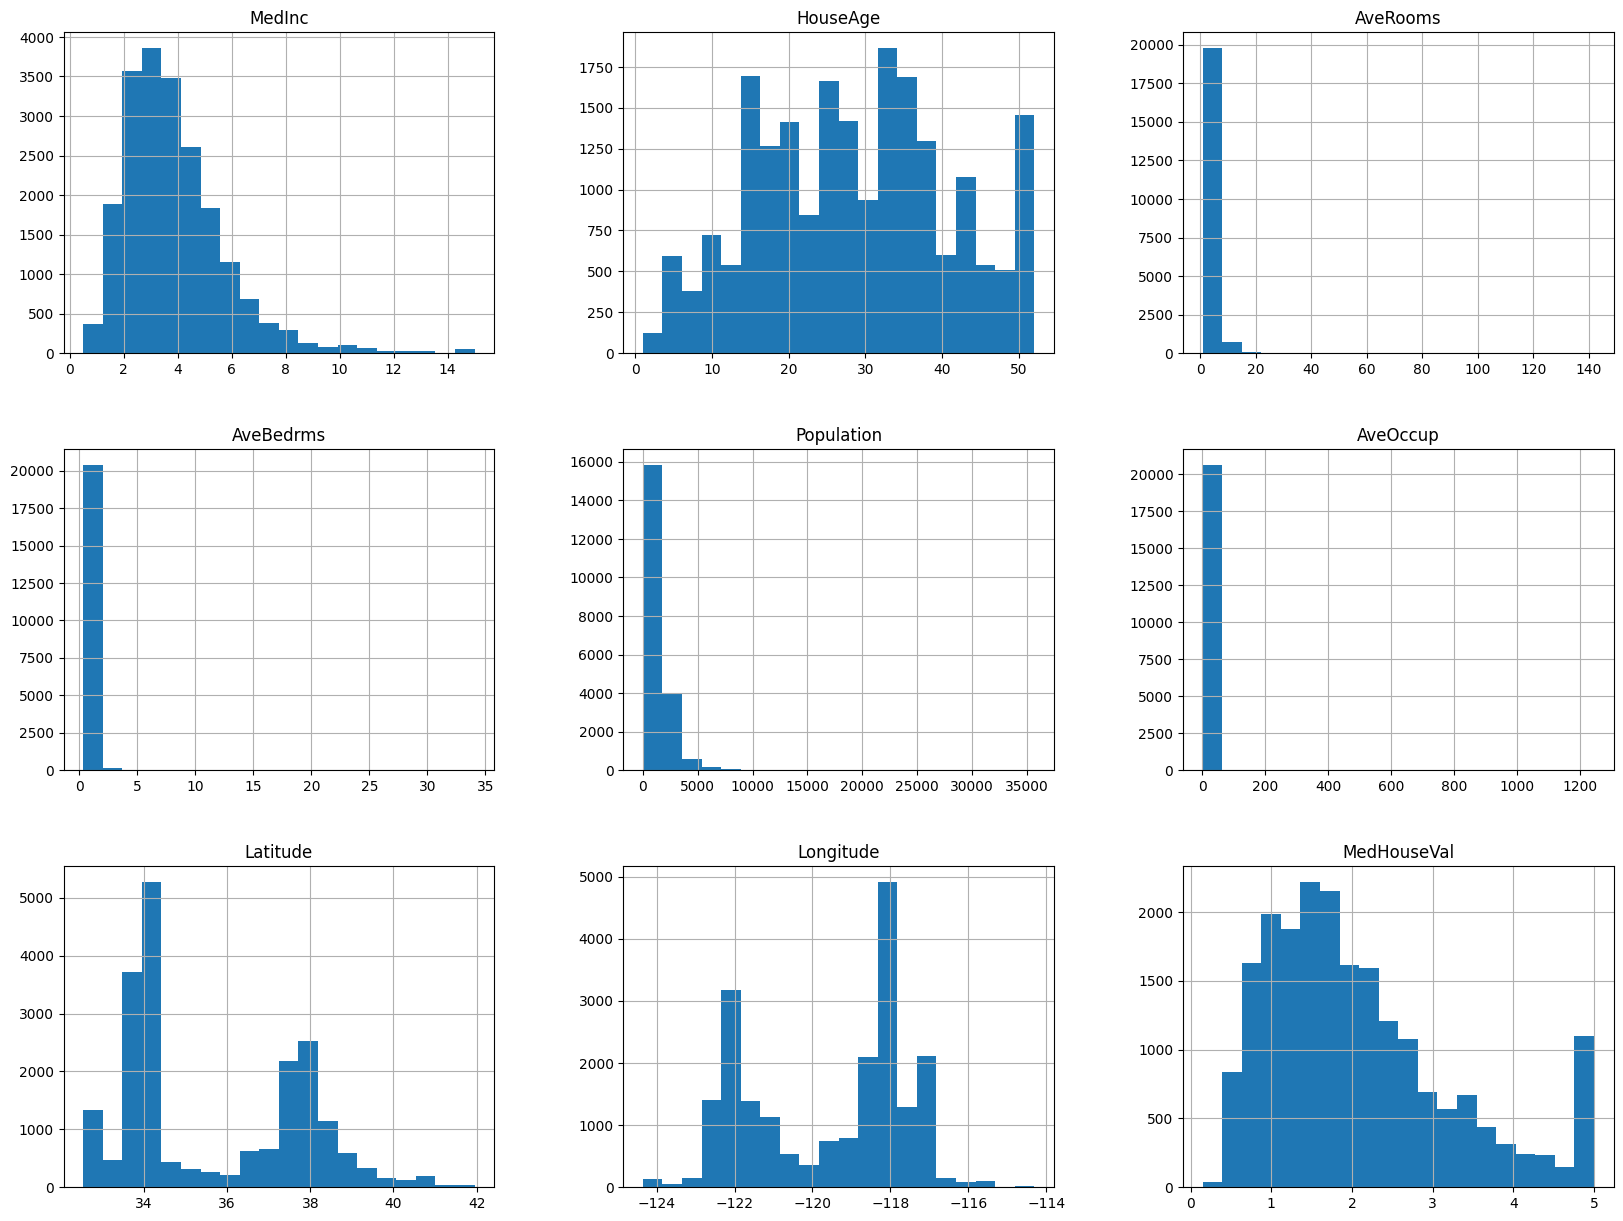

In [10]:
# Visualization - Histograms
df.hist(bins=20, figsize=(20, 15))
plt.show()

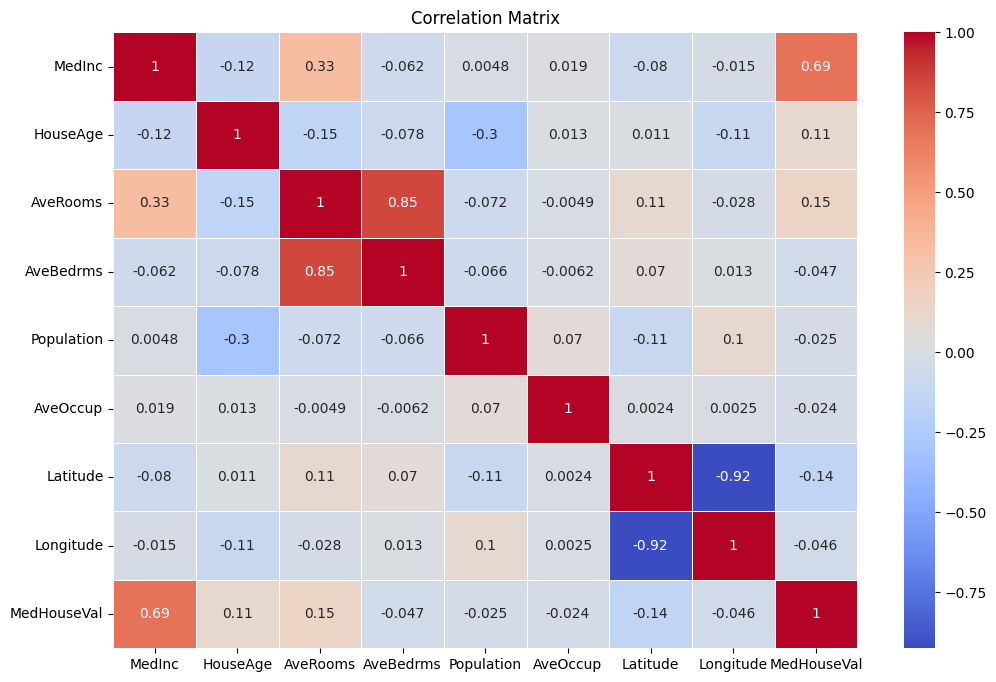

In [11]:
# Visualization - Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

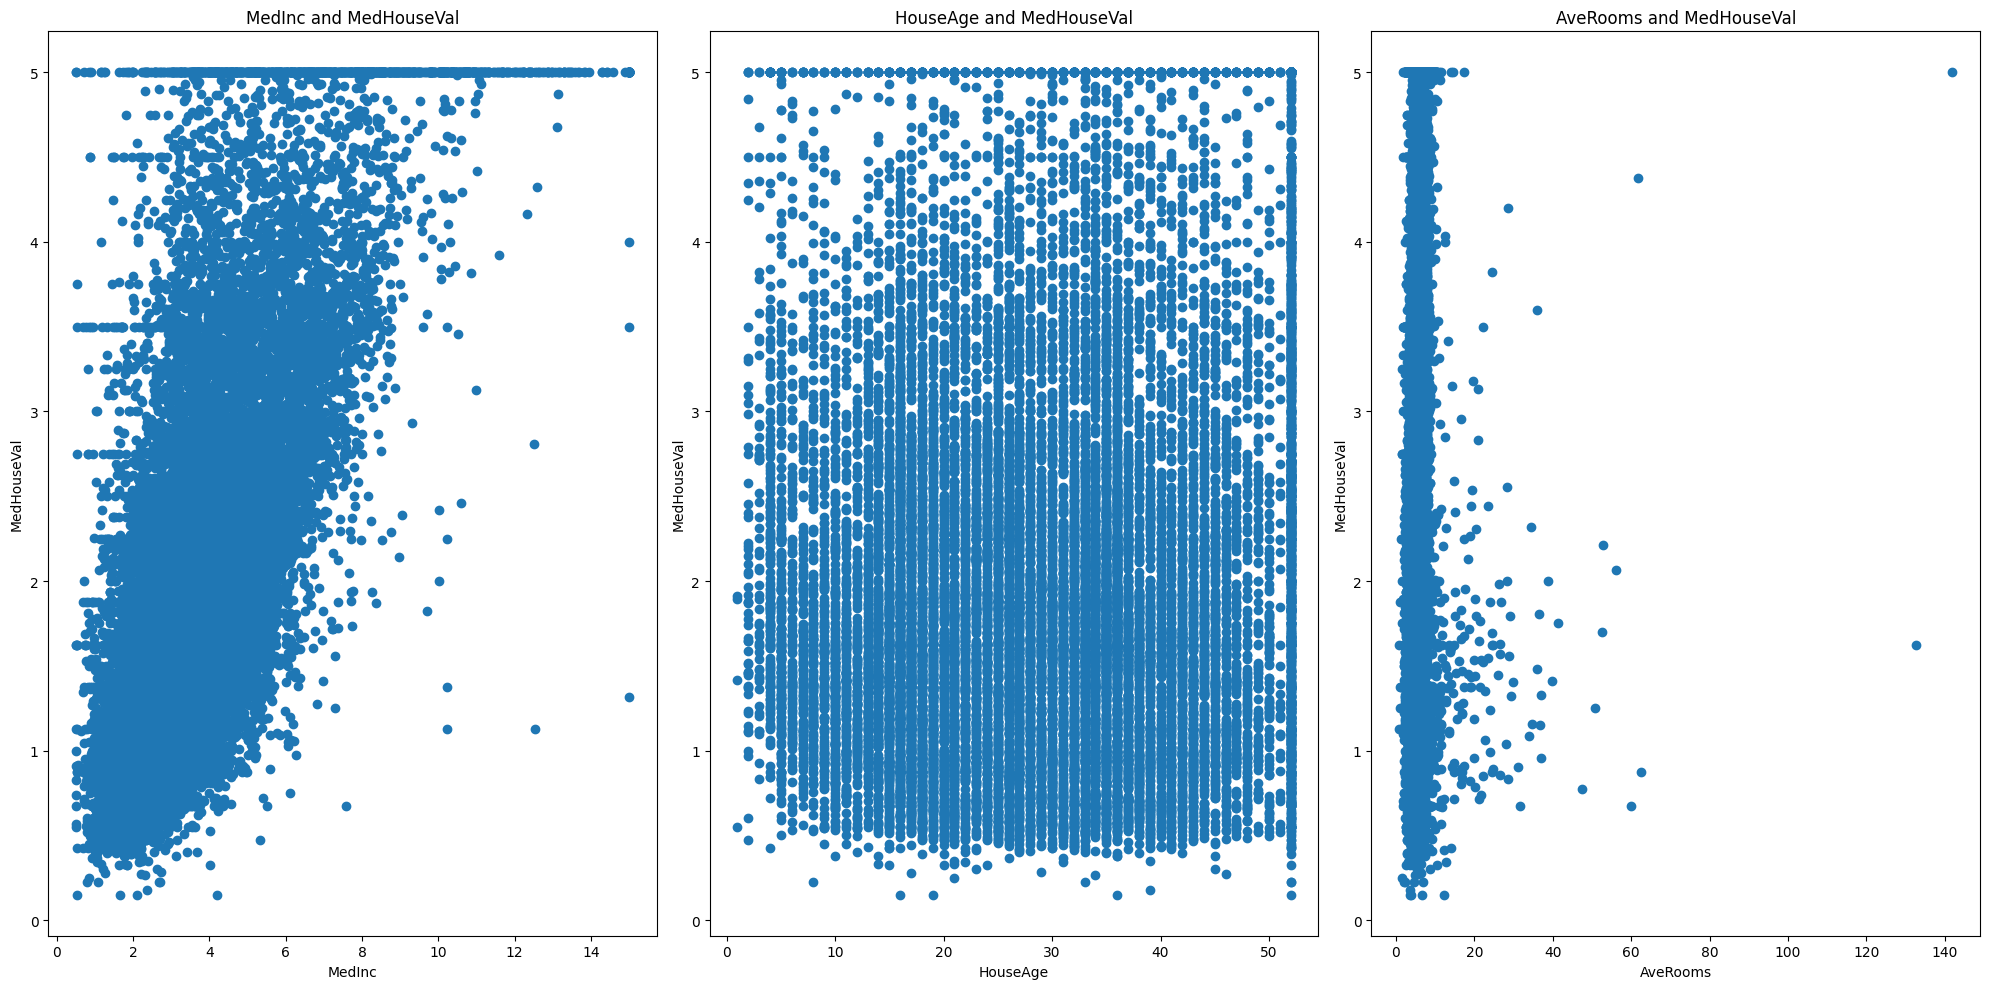

In [12]:
# Scatter plot for relationships between features
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns[:3]):  # Only plotting the first 3 features for demonstration
    plt.subplot(1, 3, i+1)
    x = df[col]
    y = df['MedHouseVal']
    plt.scatter(x, y, marker='o')
    plt.title(col + ' and MedHouseVal')
    plt.xlabel(col)
    plt.ylabel('MedHouseVal')
plt.tight_layout()
plt.show()

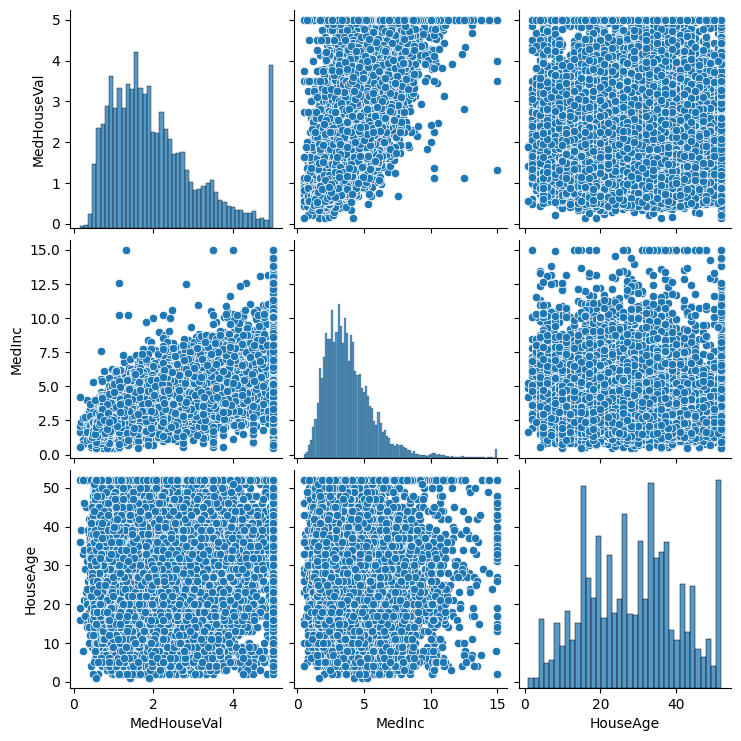

In [13]:
# Advanced Visualizations
sns.pairplot(df[['MedHouseVal', 'MedInc', 'HouseAge']])
plt.show()

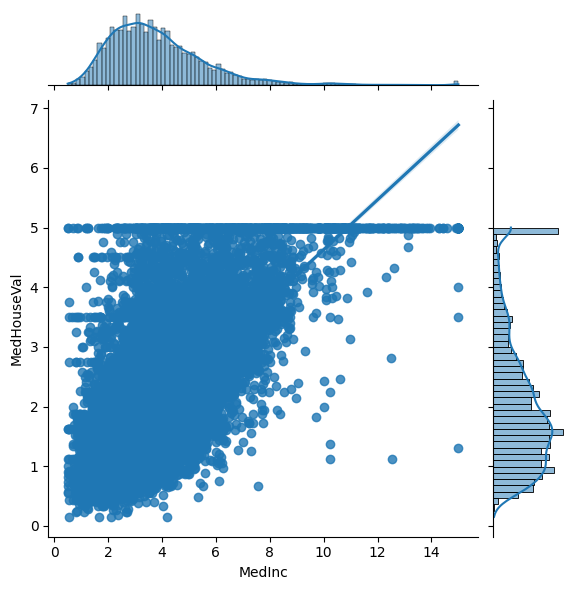

In [14]:
sns.jointplot(x='MedInc', y='MedHouseVal', data=df, kind='reg')
plt.show()